## Credit risk model
#### This is the final project for the CSCA 5622 class, introduction to supervised learning.


<img src="img/paying-off-a-loan-early.jpg" alt="Final project" width="200"/>

##### Dataset Description:

The dataset contains anonymized information about loan applicants, including personal, financial, and loan-specific features. It will be used to build a machine learning model to predict loan status (whether a loan is likely to be paid or defaulted).

- person_age:	Age
- person_income	Annual: Income
- person_home_ownership:	Home ownership
- person_emp_length:	Employment length (in years)
- loan_intent:	Loan intent
- loan_grade:	Loan grade
- loan_amnt:	Loan amount
- loan_int_rate:	Interest rate
- loan_status:	Loan status (0 is non default 1 is default)
- loan_percent_income:	Percent income
- cb_person_default_on_file:	Historical default
- cb_preson_cred_hist_length:	Credit history length

##### Lao Tse. (2019). Credit Risk Dataset . Kaggle. https://www.kaggle.com/datasets/laotse/credit-risk-dataset


##### Problem Description:

This is a loan risk modeling problem. The main objective is to build a binary classifier to predict the probability of default for each loan applicant based on the features described above. In real world scenarios this is a typical problem that financial institucions face to approve or reject applications based on many features.

### Exploratory Data Analysis

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/credit_risk_dataset.csv')

In [4]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Let's see the data size

In [5]:
print('Data size:', data.shape)

Data size: (32581, 12)


In [6]:
numerical_features = ['person_age', 'person_income',
       'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
        'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership',
        'loan_intent', 'loan_grade',
        'cb_person_default_on_file']
target = 'loan_status'

In [7]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

As we can see there are two features with null values, we need to take care of those in the preprocessing step

In [8]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Lets take a look into the descripcion of numerical variables.

In [9]:
# First, let's desactvate the scientific notation
pd.set_option('display.float_format', '{:.3f}'.format)

data[numerical_features].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32581.000,32581.000,31686.000,32581.000,29465.000,32581.000,32581.000
mean,27.735,66074.848,4.790,9589.371,11.012,0.170,5.804
std,6.348,61983.119,4.143,6322.087,3.240,0.107,4.055
min,20.000,4000.000,0.000,500.000,5.420,0.000,2.000
25%,23.000,38500.000,2.000,5000.000,7.900,0.090,3.000
50%,26.000,55000.000,4.000,8000.000,10.990,0.150,4.000
75%,30.000,79200.000,7.000,12200.000,13.470,0.230,8.000
max,144.000,6000000.000,123.000,35000.000,23.220,0.830,30.000


There are some features with values that seems 'outliers', we need to be cautious about these depending on the algorithm. In the preprocessing step I'll use a function called Winzorized that cuts the distribution based on methods like IQR to provent the influence of outliers

##### Now let's describe each categorical features in order to see the distribution


In [10]:
for feature in categorical_features:
    print(feature)
    print(data[feature].value_counts())
    print('*'*100)

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64
****************************************************************************************************
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64
****************************************************************************************************
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64
****************************************************************************************************
cb_person_default_on_file
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64
****************************************************************************************************


There are some categorical features with can be indeed be defined as ordinal features, for example loan_grade, we can assign a numerical value respect to the grade.

#### Now let's take a look at the target variable


In [11]:
count_target = data[target].value_counts()
print(count_target)

0    25473
1     7108
Name: loan_status, dtype: int64


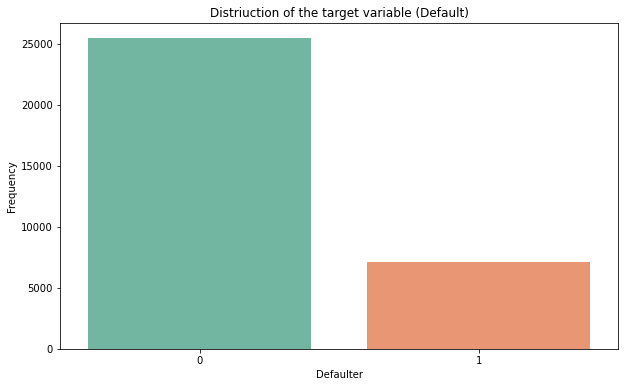

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x=target, palette="Set2")

plt.xlabel("Defaulter")
plt.ylabel("Frequency")
plt.title("Distriuction of the target variable (Default)")
plt.show()

In [13]:
data[target].isna().sum()

0

The target is an imbalanced one, so, maybe we can try techniques to tackle this.

##### Features distribution based on target
Now it would be interesting to see the distribution of features based on the target variable, in order to see the ones that maybe can be good predictors

In [14]:
data.groupby(target)[numerical_features].mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,
0,27.807,70804.362,4.969,9237.464,10.436,0.149,5.837
1,27.475,49125.652,4.138,10850.503,13.060,0.247,5.685


In [15]:
def plot_feature_distribution(feature):
    '''
    Function to plot the distribution of a feature based on the target
    
    Arguments:
        - Feature: name of the feature to plot the distribution
    Outputs:
        - Plot the desired feature distribution
    '''
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=data, x=feature, hue=target, 
                fill=True,alpha=0.4,
                clip=(data[feature].quantile(0.01), data[feature].quantile(0.95)),
                palette= "Set2")
    plt.axvline(data[data[target] == 0][feature].mean()
                , linestyle="--", linewidth=2, label=f"Average {feature} good payers", color='Green')
    plt.axvline(data[data[target] == 1][feature].mean(),
                linestyle="--", linewidth=2, label=f"Average {feature} bad payers", color='orange')

    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(f"{feature} distribution")
    plt.legend()
    plt.show()

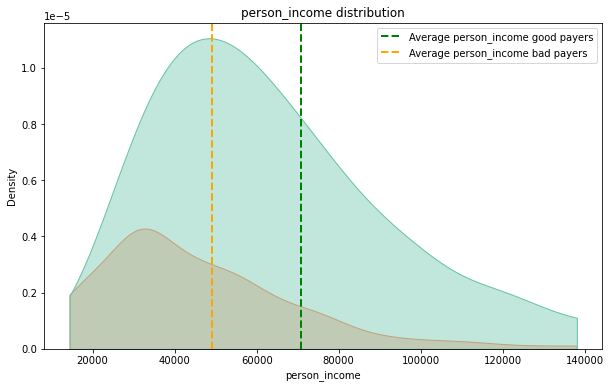

In [16]:
 plot_feature_distribution('person_income')

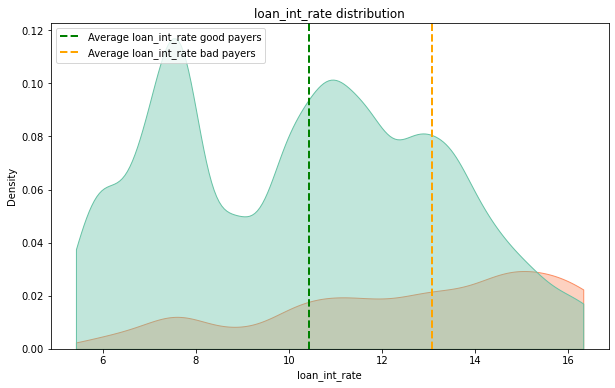

In [17]:
 plot_feature_distribution('loan_int_rate')

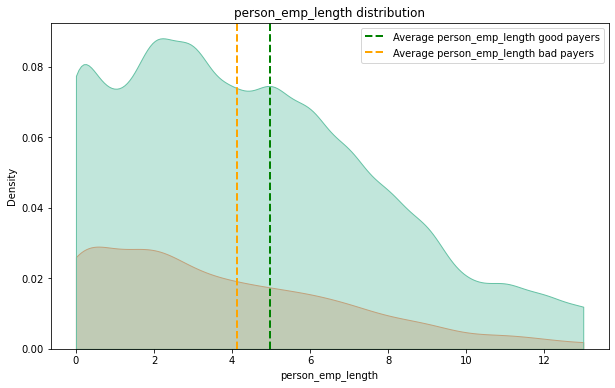

In [18]:
 plot_feature_distribution('person_emp_length')

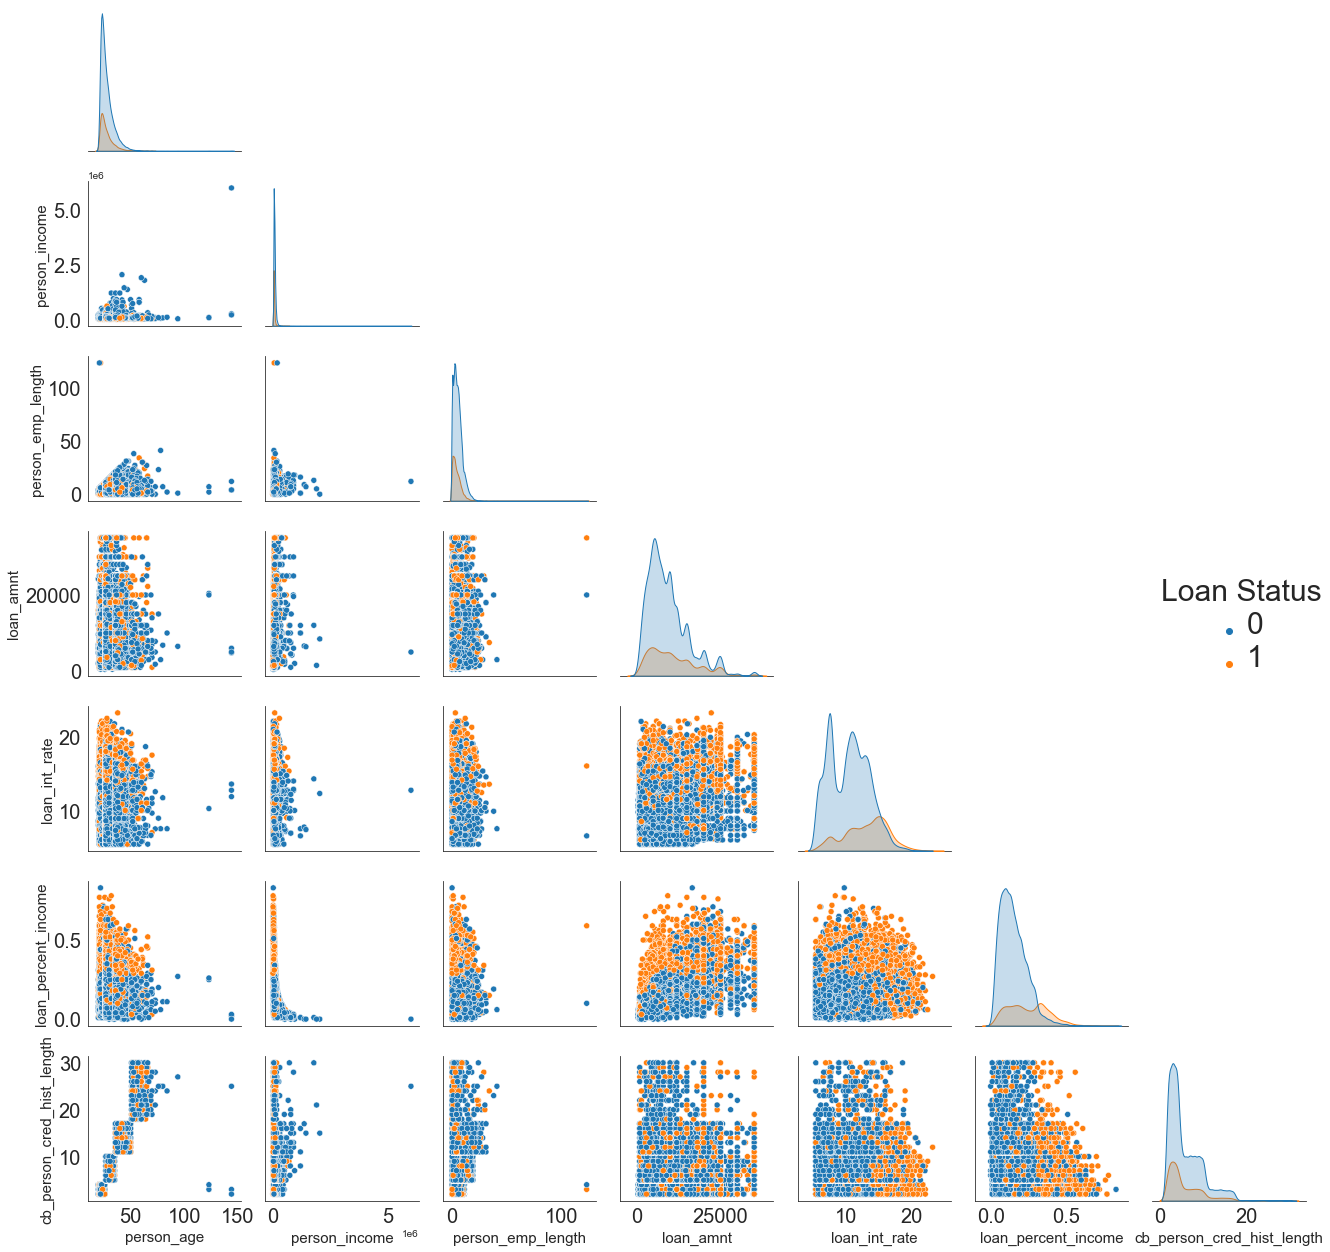

In [19]:
# Font style
sns.set_style("white")

g = sns.pairplot(
    data,
    vars=numerical_features,
    hue="loan_status",
    diag_kind="kde",
    corner=True
)
# Adjust labels and axis sizes
for ax in g.axes.flatten():
    if ax is not None:  
        ax.set_xlabel(ax.get_xlabel(), fontsize=15)
        ax.set_ylabel(ax.get_ylabel(), fontsize=15, rotation=90)
        ax.tick_params(axis="both", labelsize=20)
# Adjust axis
for text in g._legend.texts:
    text.set_fontsize(30)   # tamaño del texto
g._legend.set_title("Loan Status", prop={'size':30})  # título de la leyenda
        
plt.tight_layout()
plt.show()

##### Correlation matrix

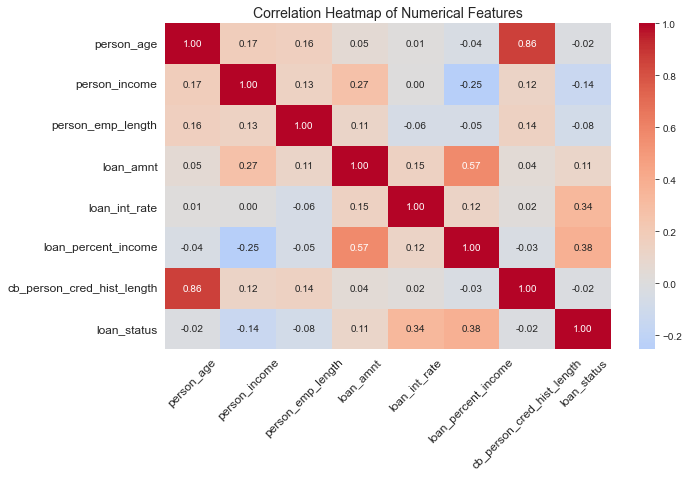

In [20]:
corr_matrix = data[numerical_features + [target]].corr()

plt.figure(figsize=(10, 6))
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
# Set font size for x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)
# Set font size for y-axis tick labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0) # Adjust rotation as needed
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

We have two variables with high correlation (person age and credit history length), let's procede to quit one of them.

In [21]:
numerical_features.remove('cb_person_cred_hist_length')

##### VIF 
Now calculate the VIF between variables in order to see multicolinearity


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For the moment lets fill null values with 0's, but in preprocessing step
# we'll be more precise with how we treat this nulls
X_vif = data[numerical_features].fillna(0)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]


In [23]:
vif_data

,feature,VIF
0,person_age,8.517
1,person_income,3.137
2,person_emp_length,2.377
3,loan_amnt,6.888
4,loan_int_rate,5.094
5,loan_percent_income,6.721


As we don't see any feature with VIF greater than 10, let's continue

### Preprocessing

Before diving into preprocessing and data imputation, we need to make sure that we don't mix train/test, because we don't want to have data leakage.


This happens, for example, if we impute the null values with the mean of all data, including the test.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data[numerical_features + categorical_features]
y = data[target]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
print('X_train size:', X_train.shape)
print('X_test size:', X_test.shape)

X_train size: (26064, 10)
X_test size: (6517, 10)


In [28]:
X_train.isna().sum()

person_age                      0
person_income                   0
person_emp_length             717
loan_amnt                       0
loan_int_rate                2479
loan_percent_income             0
person_home_ownership           0
loan_intent                     0
loan_grade                      0
cb_person_default_on_file       0
dtype: int64

##### Data imputation

Let's impute the person_emp_length with 0's, assuming that those with null doesn't have employment experience

In [29]:
X_train['person_emp_length'] = X_train['person_emp_length'].fillna(0)
X_test['person_emp_length'] = X_test['person_emp_length'].fillna(0)

Maybe we can quit those with null in interest rate, but it seems, that those have an fewer defaulters so lets impute the wih -1, as I'll use ensembles tree models and can treat them as special if we set -1

In [30]:
print('Defaulters in all train:', np.round(100*y_train.mean(), 2))
print('Defaulters in train with null interest rate:', 
      np.round(100*y_train[X_train['loan_int_rate'].isna()].mean(), 2))

Defaulters in all train: 21.73
Defaulters in train with null interest rate: 20.77


In [31]:
X_train['loan_int_rate'] = X_train['loan_int_rate'].fillna(-1)
X_test['loan_int_rate'] = X_test['loan_int_rate'].fillna(-1)

##### Outliers

In [32]:
from feature_engine.outliers import Winsorizer

In [33]:
winsor = Winsorizer(
    capping_method='iqr',
    tail='both', # Limith both features extremes
    fold=1.5,
    variables=numerical_features
)

Before winzorizer

In [34]:
X_train[numerical_features].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
count,26064.000,26064.000,26064.000,26064.000,26064.000,26064.000
mean,27.765,66171.844,4.656,9601.073,9.868,0.170
std,6.392,63599.332,4.127,6315.753,4.674,0.107
min,20.000,4000.000,0.000,500.000,-1.000,0.000
25%,23.000,39000.000,2.000,5000.000,7.490,0.090
50%,26.000,55000.000,4.000,8000.000,10.620,0.150
75%,30.000,79500.000,7.000,12250.000,13.110,0.230
max,144.000,6000000.000,123.000,35000.000,22.480,0.780


In [35]:
# Train with the train data and transform the test
X_train = winsor.fit_transform(X_train)
X_test = winsor.transform(X_test)


After winzorizer

In [36]:
X_train[numerical_features].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
count,26064.000,26064.000,26064.000,26064.000,26064.000,26064.000
mean,27.462,62442.049,4.572,9428.159,9.873,0.169
std,5.287,31812.799,3.799,5829.655,4.661,0.103
min,20.000,4000.000,0.000,500.000,-0.940,0.000
25%,23.000,39000.000,2.000,5000.000,7.490,0.090
50%,26.000,55000.000,4.000,8000.000,10.620,0.150
75%,30.000,79500.000,7.000,12250.000,13.110,0.230
max,40.500,140250.000,14.500,23125.000,21.540,0.440


##### Categorical variables
Now let's transform the categorical features into ordinal features, using the fearure_engine library wich assigns the order based on the target of each category in the training data. for example, if the category 'A' is the one with most proportion of defaulters, it assigns the highst number, and so on.

It's important to note that this is based only in the training data and doesn't involve the test

In [37]:
from feature_engine.encoding import OrdinalEncoder

In [38]:
ordinal_encoder = OrdinalEncoder(
            variables=categorical_features, encoding_method='ordered',
            ignore_format=True
            )

In [39]:
ordinal_encoder.fit(X_train, y_train)

OrdinalEncoder(ignore_format=True,
               variables=['person_home_ownership', 'loan_intent', 'loan_grade',
                          'cb_person_default_on_file'])

In [40]:
# Let's see how it works
example_functionality_orinal_encoder = X_train[['person_home_ownership']]
example_functionality_orinal_encoder['TARGET'] = y_train
example_functionality_orinal_encoder.groupby('person_home_ownership')['TARGET'].mean()

/var/folders/q6/n6rgc74x44dc9p4jhvcb_p0w0000gp/T/ipykernel_43535/3365796451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_functionality_orinal_encoder['TARGET'] = y_train


person_home_ownership
MORTGAGE   0.124
OTHER      0.301
OWN        0.077
RENT       0.315
Name: TARGET, dtype: float64

In [41]:
example_functionality_orinal_encoder['person_home_ownership'].value_counts()

RENT        13150
MORTGAGE    10759
OWN          2072
OTHER          83
Name: person_home_ownership, dtype: int64

We can see that the category RENT is the one with most defaulters whereas the 'ONE' is the one with less dfefaulters, and makes sense.

Now, let's transform the data

In [42]:
X_train = ordinal_encoder.transform(X_train)

In [43]:
X_train['person_home_ownership'].value_counts()

3    13150
1    10759
0     2072
2       83
Name: person_home_ownership, dtype: int64

We can see that the 0 is the 'OWN' and 3 is 'RENT'

Now, let's transform the X_test, and we see that I don't pass the y_test


In [44]:
X_test = ordinal_encoder.transform(X_test)

Now, all the features are numerical, which is great for the models- It depends on the model if we need to scale the features, for ensembles methods based on Decision trees, we don't need to do it. I'll use a Logistic Regression, so for that specific model I'll scale the data later

In [45]:
X_train.dtypes

person_age                   float64
person_income                float64
person_emp_length            float64
loan_amnt                    float64
loan_int_rate                float64
loan_percent_income          float64
person_home_ownership          int64
loan_intent                    int64
loan_grade                     int64
cb_person_default_on_file      int64
dtype: object

### Managing imbalanced data
In order to tackle the imbalanced data taht we have, I'll try these methods:
- Smote 
- Control the parameters that some algorithms have to overcome imbalanced data

I'll see which is better.

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
print('Before SMOTE:')
print(y_train.value_counts())

Before SMOTE:
0    20401
1     5663
Name: loan_status, dtype: int64


I'll apply SMOTE only in training data, not in testing because doing it would mean data leakage,

In [48]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [49]:
print('After SMOTE:')
print(y_train_resampled.value_counts())

After SMOTE:
0    20401
1    20401
Name: loan_status, dtype: int64


### Models
As we are dealing with an imbalanced dataset, it's better to user the AUC as metric for evaluating the model because using accuracy for example, can lead to misleading results.

But I'll show you other metrics as well.

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [52]:
xgb_model = XGBClassifier(
    objective="binary:logistic", # This is for binary classification problems, 
    # in this case as we are building a credit risk model
    # it helps to output a probability
    eval_metric="auc", 
    use_label_encoder=False,
    random_state=102,
    verbosity=1
)

##### scale_pos_weight: Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances). https://xgboost.readthedocs.io/en/stable/parameter.html

This is the parameter for dealing with the imbalanced dataset

In [53]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

scale_pos_weight = 3.60


In [54]:
# Define the parameter space
param_dist = {
    "n_estimators": [100, 150, 200, 250, 300, 500], # Number of trees
    "max_depth": [3, 5, 7, 10], # Max depth of each tree
    "learning_rate": [0.01, 0.05, 0.1, 0.2], # The learning rate, we saw this in class
    "subsample": [0.6, 0.8, 1.0], # Sample proportion of training observations in each round
    "colsample_bytree": [0.6, 0.8, 1.0], # Proportion of features used in each tree
    "gamma": [0, 0.1, 0.2, 0.5], # Minimum loss reduction required to 
    # make a further partition on a leaf node of the tree
    "min_child_weight": [1, 3, 5, 7], # Minimum sum of instance weight
    # (hessian) needed in a child
    "scale_pos_weight": [scale_pos_weight, scale_pos_weight*0.5, scale_pos_weight*1.5]
}

In [55]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    random_state=102,
    n_jobs=-1
)

# Entrenar búsqueda
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           mo...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 500],
                                        'scale_pos_weight': [3.6025075048560833,
                                                             1.8012537524280416,
                                                             5.403761257284125],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=102, scoring='roc_auc', verbose=1)

In [56]:
print("Best params:")
print(random_search.best_params_)

best_xgb_model = random_search.best_estimator_

Best params:
{'subsample': 1.0, 'scale_pos_weight': 1.8012537524280416, 'n_estimators': 150, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


##### XGBoost evaluation

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
y_train_prob = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_prob = best_xgb_model.predict_proba(X_test)[:, 1]
y_test_pred = best_xgb_model.predict(X_test)

In [59]:
# Left`s define a function for plotting the AUC Curve
def plot_auc(y_train, y_train_prob, y_test, y_test_prob, model):
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize=(8,6))
    plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", color="orange")
    plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", color="green")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve {model}")
    plt.legend(loc="lower right", prop={'size':20})
    plt.grid(True)
    plt.show()

In [60]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5072
           1       0.93      0.75      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.93      0.87      0.90      6517
weighted avg       0.93      0.93      0.93      6517



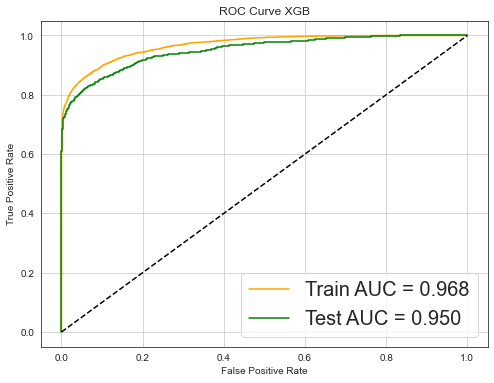

In [61]:
plot_auc(
    y_train=y_train, y_train_prob=y_train_prob,
    y_test=y_test, y_test_prob=y_test_prob, model='XGB')

In [90]:
def plot_confusion_matrix(y_test, y_test_pred, clf, title=None):
    cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    fig, ax = plt.subplots(figsize=(8, 6))
    # Change the colors of the matrix
    disp.plot(ax=ax, cmap='Blues', colorbar=True, values_format='d')  # 'd' para enteros
    # Title and size
    ax.set_title(title, fontsize=20)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    # Change the size of numbers in each square
    for labels in disp.text_.ravel():
        labels.set_fontsize(15)  # Sets the font size to 30
    # Save the image
    plt.savefig(f"img/{title}.png", bbox_inches='tight')
    plt.show()

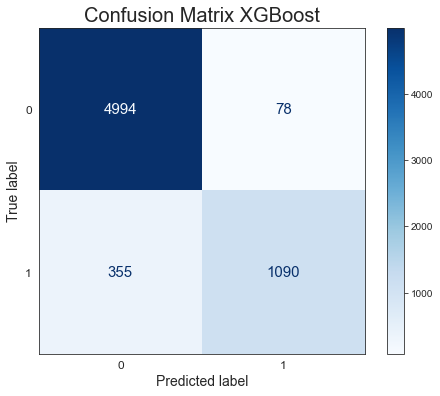

In [91]:
plot_confusion_matrix(
    y_test, y_test_pred, best_xgb_model, 'Confusion Matrix XGBoost')

#### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier(
    random_state=102,
    class_weight='balanced'  #This parameter helps for imbalanced datasets
)

param_dist_rf = {
    "n_estimators": [100,150,  200, 500, 800],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=102,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=102),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5, 0.7],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 150, 200, 500,
                                                         800]},
                   random_state=102, scoring='roc_auc', verbose=2)

In [94]:
print("Best params:")
print(random_search_rf.best_params_)

best_rf_model = random_search_rf.best_estimator_

Best params:
{'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 0.7, 'max_depth': 20}


#### Random Forest evaluation

In [95]:
y_train_prob_rf = best_rf_model.predict_proba(X_train)[:, 1]
y_test_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_test_pred_rf = best_rf_model.predict(X_test)

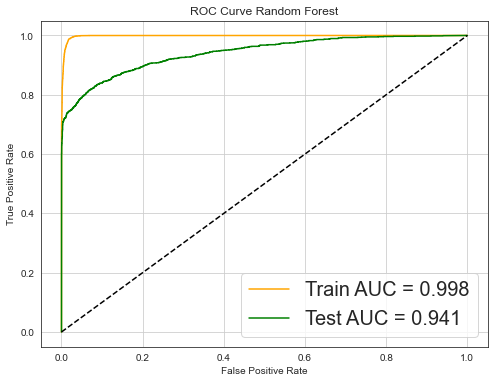

In [96]:
plot_auc(
    y_train=y_train, y_train_prob=y_train_prob_rf,
    y_test=y_test, y_test_prob=y_test_prob_rf, model='Random Forest')

In [97]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.94      0.74      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.93      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517



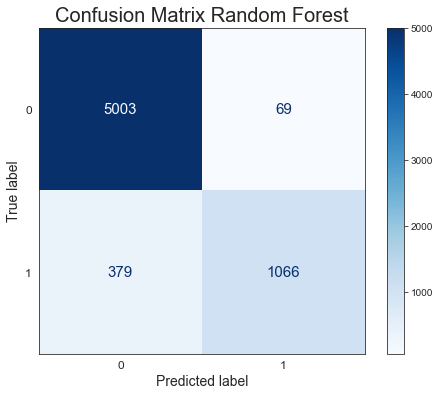

In [98]:
plot_confusion_matrix(
    y_test, y_test_pred_rf, best_rf_model, 'Confusion Matrix Random Forest')

#### Random Forest with SMOTE

In [99]:
rf_smote = RandomForestClassifier(
    random_state=102,
    #class_weight='balanced'  Now, let's quit this parameter that
    # try to balance the imabalanced data and use the SMOTE balanced data
)

param_dist_rf = {
    "n_estimators": [100,150,  200, 500, 800],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.3, 0.5, 0.7]
}

random_search_rf_smote = RandomizedSearchCV(
    estimator=rf_smote,
    param_distributions=param_dist_rf,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=102,
    n_jobs=-1
)

random_search_rf_smote.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=102),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5, 0.7],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 150, 200, 500,
                                                         800]},
                   random_state=102, scoring='roc_auc', verbose=1)

In [100]:
print("Best params:")
print(random_search_rf_smote.best_params_)

best_rf_smote_model = random_search_rf_smote.best_estimator_

Best params:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


##### Random Forest SMOTE evaluation

In [101]:
y_train_prob_rf_smote = best_rf_smote_model.predict_proba(X_train_resampled)[:, 1]
y_test_prob_rf_smote = best_rf_smote_model.predict_proba(X_test)[:, 1]
y_test_pred_rf_smote = best_rf_smote_model.predict(X_test)

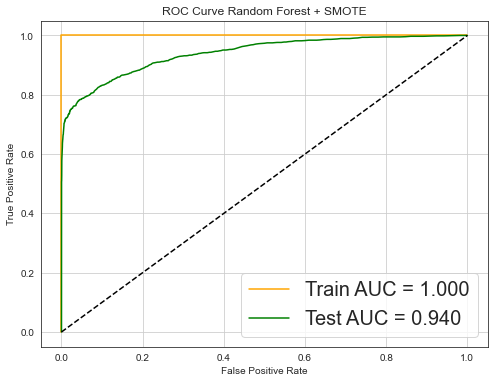

In [102]:
plot_auc(
    y_train=y_train_resampled, y_train_prob=y_train_prob_rf_smote,
    y_test=y_test, y_test_prob=y_test_prob_rf_smote, model='Random Forest + SMOTE')

In [103]:
print(classification_report(y_test, y_test_pred_rf_smote))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5072
           1       0.87      0.76      0.81      1445

    accuracy                           0.92      6517
   macro avg       0.90      0.86      0.88      6517
weighted avg       0.92      0.92      0.92      6517



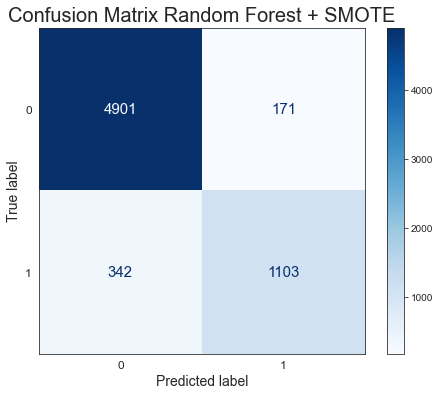

In [104]:
plot_confusion_matrix(
    y_test, y_test_pred_rf_smote, best_rf_smote_model, 'Confusion Matrix Random Forest + SMOTE')

As we can see, we have better results with the balanced parameters than using SMOTE, and indeed, the gap between AUC in train/test is much higher, so, It's a better option choose the model that uses balanced parameter instead of SMOTE.

#### Logistic Regression

##### In order to use the Logistic regression, we need to scale the data as the features are in distinct magnitudes

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [106]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

As Logistic Regression is faster I'll use Gridsearch instead of Randomized Search

In [107]:
lr_model = LogisticRegression(
    class_weight='balanced' # This parameter overcomes imbalanced data
    ,random_state=102)

param_grid_lr = {
    'C': np.logspace(-4,4,20),
    'penalty': ['l1', 'l2'],
    'max_iter'  : [100, 1000, 2500, 5000],
    'solver': ['liblinear', 'saga']
}
random_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=3,
    verbose=False,
    n_jobs=-1
)

random_search_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=102),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc', verbose=False)

In [108]:
print("Best params:")
print(random_search_lr.best_params_)

best_lr_model = random_search_lr.best_estimator_

Best params:
{'C': 0.03359818286283781, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


##### Logistic regression evaluation

In [109]:
y_train_prob_lr = best_lr_model.predict_proba(X_train_scaled)[:, 1]
y_test_prob_lr = best_lr_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred_lr = best_lr_model.predict(X_test_scaled)

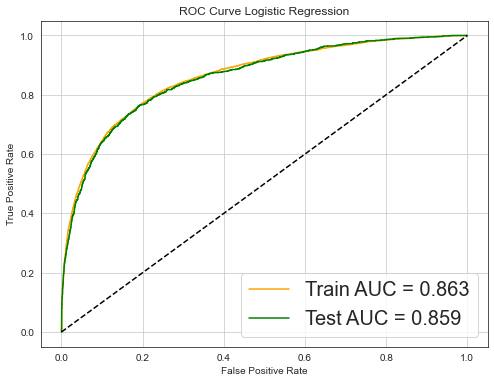

In [110]:
plot_auc(
    y_train=y_train, y_train_prob=y_train_prob_lr,
    y_test=y_test, y_test_prob=y_test_prob_lr, model='Logistic Regression')

In [111]:
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      5072
           1       0.51      0.78      0.62      1445

    accuracy                           0.79      6517
   macro avg       0.72      0.78      0.73      6517
weighted avg       0.83      0.79      0.80      6517



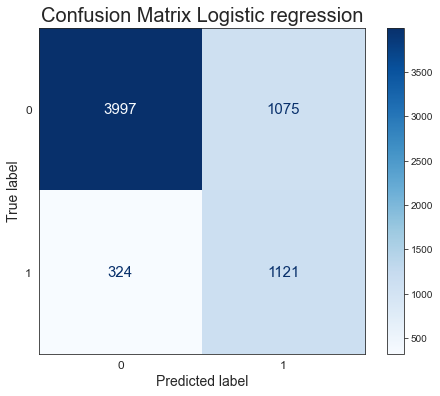

In [112]:
plot_confusion_matrix(
    y_test, y_test_pred_lr, best_lr_model, 'Confusion Matrix Logistic regression')

### Compare results

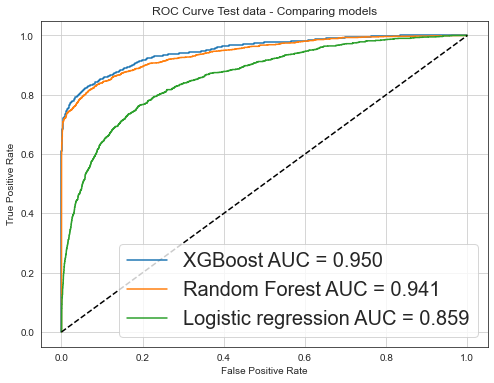

In [114]:
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_prob)
auc_test_xgb = auc(fpr_test_xgb, tpr_test_xgb)

fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_prob_rf)
auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

fpr_test_lr, tpr_test_lr, _ = roc_curve(y_test, y_test_prob_lr)
auc_test_lr = auc(fpr_test_lr, tpr_test_lr)


plt.figure(figsize=(8,6))
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f"XGBoost AUC = {auc_test_xgb:.3f}")
plt.plot(fpr_test_rf, tpr_test_rf, label=f"Random Forest AUC = {auc_test_rf:.3f}")
plt.plot(fpr_test_lr, tpr_test_lr, label=f"Logistic regression AUC = {auc_test_lr:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve Test data - Comparing models")
plt.legend(loc="lower right", prop={'size':20})
plt.grid(True)
plt.show()

As the problem is to predict the probability of default and the XGBoost performs a little bit better I'll choose the XGboost, because in real world scenarios a small improvement in AUC can indeed mean a lot of improvement in profitability.

Also, the gap between train and test AUC is much lower in XGBoost model than Random Forest.

In [116]:
# Let's save the selected model XGBoost
import joblib
joblib.dump(best_xgb_model, 'models/best_xgboost_model.joblib')

['models/best_xgboost_model.joblib']

### Feature explainability
Let's explore how the features influence the probability of default. For this parte I'll use shap values, as it is a method commonly used in the industry for explaining it.

In [229]:
import shap

In [230]:
explainer = shap.TreeExplainer(best_xgb_model)

In [231]:
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


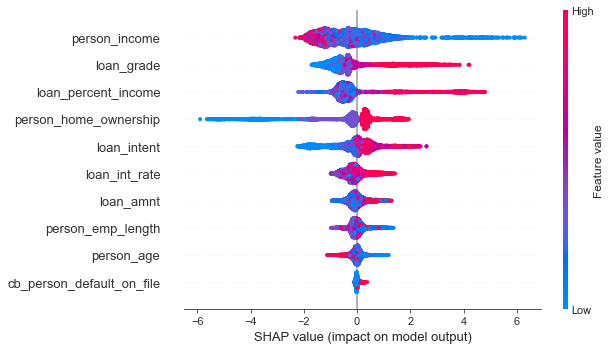

In [232]:
plt.figure(figsize=(16,16))
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

As we can see the most important feature is the income, and the last important is db_person_default_on_file (Historical default).

We can interpter the influence of each feature the following way:
- The blue color means low values in the feature.
- If the shap values are in the right of the zero means an increase on the probability of default

Example: Person income
- We see blue values in th the right of the zero, so, lower income increases the probability of default, whereas higher income (red) means lower probability of defaut, which makes sense.


#####  Categorical encoder dictionary
Here we have the meaning of each categorical variable in terms of numbers

In [233]:
ordinal_encoder.encoder_dict_

{'person_home_ownership': {'OWN': 0, 'MORTGAGE': 1, 'OTHER': 2, 'RENT': 3},
 'loan_intent': {'VENTURE': 0,
  'EDUCATION': 1,
  'PERSONAL': 2,
  'HOMEIMPROVEMENT': 3,
  'MEDICAL': 4,
  'DEBTCONSOLIDATION': 5},
 'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
 'cb_person_default_on_file': {'N': 0, 'Y': 1}}

If we analyze the person home ownership we see that higher values of the feature means an increase of probability. If we see the encoder, we can observe that the highest value is 3, which means 'Rent', and the lowest is 'Own'. Makes sense that the persons who have own house have lower probability of default and the ones who rent are riskier.

### Concusion
- The model developed has a high AUC which is great for the probability of default model, as if is put into production we'll need a model that solves the problem of rejecting bad customers and accepting the good ones effectively.
- I've discarted the redundant variables through correlation analysis and VIF.
- We saw that ensembles model are better suited for this problem as outperforms the logistic regression.
- The variables interpretaibilty makes sense as it doesn't have unexpected behavior.
- The income of a person is the most important feature for the model



### Next steps
- Try to improve the model AUC using other tools for hyperparameter tuning like Optuna
- Check if the model is well calibrated, that means, if the model output correspond to the probability
- In real world scenarios, risk models needs to comply certain requeriments, one of them is to check if it is data drift overtime. This data doesn't have timestamp variable, so, we couldn't check that.
- Try to construct new features based on the base ones.